In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import csv

from config import census_api_key
from pprint import pprint

In [2]:
# Save config information
url1 = 'https://api.census.gov/data/2000/pep/int_population?get='

# Build query URL
query_url1 = url1 + "POP,GEONAME&for=PLACE:28068&in=state:48&DATE=6,7,8,9,10,11&key=" + census_api_key
response1 = requests.get(query_url1)
response_json1 = response1.json()
print(response_json1)

[['POP', 'GEONAME', 'DATE', 'state', 'place'], ['53950', 'Galveston city, Texas', '6', '48', '28068'], ['53122', 'Galveston city, Texas', '7', '48', '28068'], ['52141', 'Galveston city, Texas', '8', '48', '28068'], ['51181', 'Galveston city, Texas', '9', '48', '28068'], ['50281', 'Galveston city, Texas', '10', '48', '28068'], ['48374', 'Galveston city, Texas', '11', '48', '28068']]


In [3]:
# Convert to DataFrame
galveston_df1 = pd.DataFrame(response_json1)

# String replace index
new_header = galveston_df1.iloc[0]
galveston_df1 = galveston_df1[1:]
galveston_df1.columns = new_header
galveston_df1

,POP,GEONAME,DATE,state,place
1,53950,"Galveston city, Texas",6,48,28068
2,53122,"Galveston city, Texas",7,48,28068
3,52141,"Galveston city, Texas",8,48,28068
4,51181,"Galveston city, Texas",9,48,28068
5,50281,"Galveston city, Texas",10,48,28068
6,48374,"Galveston city, Texas",11,48,28068


In [4]:
# Save config information
url2 = 'https://api.census.gov/data/2017/pep/population?get='

# Build query URL
query_url2 = url2 + "POP,GEONAME&for=PLACE:28068&in=state:48&DATE=3,4,5,6,7,8&key=" + census_api_key
response2 = requests.get(query_url2)
response_json2 = response2.json()
print(response_json2)

[['POP', 'GEONAME', 'DATE', 'state', 'place'], ['47795', 'Galveston city, Texas', '3', '48', '28068'], ['47567', 'Galveston city, Texas', '4', '48', '28068'], ['48125', 'Galveston city, Texas', '5', '48', '28068'], ['48711', 'Galveston city, Texas', '6', '48', '28068'], ['49322', 'Galveston city, Texas', '7', '48', '28068'], ['49765', 'Galveston city, Texas', '8', '48', '28068']]


In [5]:
# Convert to DataFrame
galveston_df2 = pd.DataFrame(response_json2)

# String replace index
new_header = galveston_df2.iloc[0]
galveston_df2 = galveston_df2[1:]
galveston_df2.columns = new_header
galveston_df2

,POP,GEONAME,DATE,state,place
1,47795,"Galveston city, Texas",3,48,28068
2,47567,"Galveston city, Texas",4,48,28068
3,48125,"Galveston city, Texas",5,48,28068
4,48711,"Galveston city, Texas",6,48,28068
5,49322,"Galveston city, Texas",7,48,28068
6,49765,"Galveston city, Texas",8,48,28068


In [6]:
# Rename headers
galveston_df1 = galveston_df1.rename(columns={'POP': 'Population',
                                              'GEONAME': 'City, State',
                                              'DATE': 'Year',
                                              'state': 'State',
                                              'place': 'City'})
galveston_df1

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",6,48,28068
2,53122,"Galveston city, Texas",7,48,28068
3,52141,"Galveston city, Texas",8,48,28068
4,51181,"Galveston city, Texas",9,48,28068
5,50281,"Galveston city, Texas",10,48,28068
6,48374,"Galveston city, Texas",11,48,28068


In [7]:
# Rename headers
galveston_df2 = galveston_df2.rename(columns={'POP': 'Population',
                                              'GEONAME': 'City, State',
                                              'DATE': 'Year',
                                              'state': 'State',
                                              'place': 'City'})
galveston_df2

,Population,"City, State",Year,State,City
1,47795,"Galveston city, Texas",3,48,28068
2,47567,"Galveston city, Texas",4,48,28068
3,48125,"Galveston city, Texas",5,48,28068
4,48711,"Galveston city, Texas",6,48,28068
5,49322,"Galveston city, Texas",7,48,28068
6,49765,"Galveston city, Texas",8,48,28068


In [8]:
# Replace values
galveston_df1['Year'] = galveston_df1['Year'].replace({'6':'2004', '7':'2005', '8':'2006', '9':'2007', '10':'2008', '11':'2009'})
galveston_df1["Year"] = pd.to_numeric(galveston_df1["Year"])
galveston_df1["Population"] = pd.to_numeric(galveston_df1["Population"])
galveston_df1

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",2004,48,28068
2,53122,"Galveston city, Texas",2005,48,28068
3,52141,"Galveston city, Texas",2006,48,28068
4,51181,"Galveston city, Texas",2007,48,28068
5,50281,"Galveston city, Texas",2008,48,28068
6,48374,"Galveston city, Texas",2009,48,28068


In [9]:
# Replace values
galveston_df2['Year'] = galveston_df2['Year'].replace({'3':'2010', '4':'2011', '5':'2012', '6':'2013', '7':'2014', '8':'2015'})
galveston_df2["Year"] = pd.to_numeric(galveston_df2["Year"])
galveston_df2["Population"] = pd.to_numeric(galveston_df2["Population"])
galveston_df2

,Population,"City, State",Year,State,City
1,47795,"Galveston city, Texas",2010,48,28068
2,47567,"Galveston city, Texas",2011,48,28068
3,48125,"Galveston city, Texas",2012,48,28068
4,48711,"Galveston city, Texas",2013,48,28068
5,49322,"Galveston city, Texas",2014,48,28068
6,49765,"Galveston city, Texas",2015,48,28068


In [10]:
# Remove columns
galveston_df1.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,53950,"Galveston city, Texas",2004
2,53122,"Galveston city, Texas",2005
3,52141,"Galveston city, Texas",2006
4,51181,"Galveston city, Texas",2007
5,50281,"Galveston city, Texas",2008
6,48374,"Galveston city, Texas",2009


In [11]:
# Remove columns
galveston_df2.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,47795,"Galveston city, Texas",2010
2,47567,"Galveston city, Texas",2011
3,48125,"Galveston city, Texas",2012
4,48711,"Galveston city, Texas",2013
5,49322,"Galveston city, Texas",2014
6,49765,"Galveston city, Texas",2015


In [12]:
# Combine DataFrames
galveston_df = pd.concat([galveston_df1, galveston_df2])
galveston_df

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",2004,48,28068
2,53122,"Galveston city, Texas",2005,48,28068
3,52141,"Galveston city, Texas",2006,48,28068
4,51181,"Galveston city, Texas",2007,48,28068
5,50281,"Galveston city, Texas",2008,48,28068
6,48374,"Galveston city, Texas",2009,48,28068
1,47795,"Galveston city, Texas",2010,48,28068
2,47567,"Galveston city, Texas",2011,48,28068
3,48125,"Galveston city, Texas",2012,48,28068
4,48711,"Galveston city, Texas",2013,48,28068


In [13]:
# Remove columns
galveston_df.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,53950,"Galveston city, Texas",2004
2,53122,"Galveston city, Texas",2005
3,52141,"Galveston city, Texas",2006
4,51181,"Galveston city, Texas",2007
5,50281,"Galveston city, Texas",2008
6,48374,"Galveston city, Texas",2009
1,47795,"Galveston city, Texas",2010
2,47567,"Galveston city, Texas",2011
3,48125,"Galveston city, Texas",2012
4,48711,"Galveston city, Texas",2013


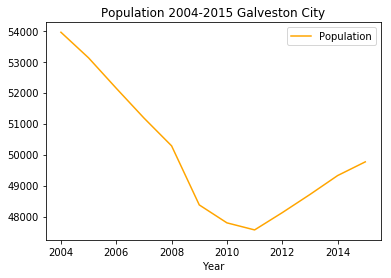

In [14]:
# Plot the graph
plot = galveston_df.plot(x='Year', y='Population', kind='line', title='Population 2004-2015 Galveston City', legend=True, color='orange')

In [15]:
# Save in PNG
fig = plot.get_figure()
fig.savefig('Population_2004-2015_Galveston_City.png')